# Libaries

In [312]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets
from torch.autograd import Variable

import numpy as np

import os

import matplotlib.pyplot as plt

# Generall

In [313]:
print('Cuda is available:',torch.cuda.is_available(),'\n')

Cuda is available: False 



# Hyperparameters

In [314]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

hidden_dim = 128

batch_size = 32

num_epochs = 10
learn_rate = 0.0002


# Load Data

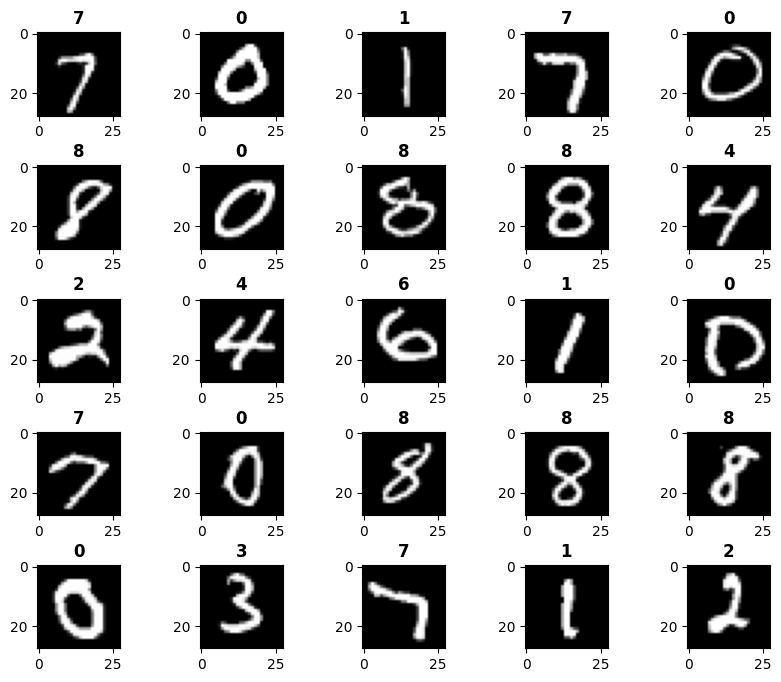

In [315]:
# create folder structure if it does not exist
folder_path = "../../data/"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)


#MNIST Dataset
    #Create Folder, transorm to Tensor
train_dataset = torchvision.datasets.MNIST(
    root=folder_path, train=True, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.01307),(0.3081))]), download=True
)

test_dataset = torchvision.datasets.MNIST(
    root=folder_path, train=False, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.01307),(0.3081))])
)

#Data Loader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=True
)

#show MNIST Dataset

figure= plt.figure(figsize=(10,8))
spalten, zeilen = 5,5
for i in range(1,spalten*zeilen+1):
    sample_idx = torch.randint(len(train_dataset),size=(1,)).item()
    image , label = train_dataset[sample_idx]
    figure.add_subplot(spalten,zeilen,i)
    plt.title(label, weight='bold')
    plt.imshow(image.squeeze(), cmap='gray')
plt.subplots_adjust(wspace=0.3,hspace=0.6)
plt.show()


# Model

In [316]:
class MNIST_De_Class(nn.Module):
    def __init__(self):
        super(MNIST_De_Class, self).__init__()
        # self.input = nn.Linear(28 * 28, 20)  # input
        # self.hidden1 = nn.Linear(20, 20)  # hidden1
        # self.hidden2 = nn.Linear(20, 20)  # hidden2
        # self.out = nn.Linear(20, 10)  # output
      
        self.network = nn.Sequential(
            nn.Linear(28 * 28, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 10),
            nn.Sigmoid(),
        )

    def forward(self, x):
        # x = self.input(x)
        # x = nn.ReLU(x)
        # x = self.hidden1(x)
        # x = nn.ReLU(x)
        # x = self.hidden2(x)
        # x = nn.ReLU(x)
        # x = self.out(x)
        # x = nn.Softmax(x)
        # print(x.size())
        return (self.network(x))

# View Prediction Setup

In [317]:
def view_classifications(img,pred):
    pred = pred.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax2.barh(np.arange(10), pred)
    
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    plt.show()
    plt.close()

# Train

Epoche:  1 Loss: 1.49240 


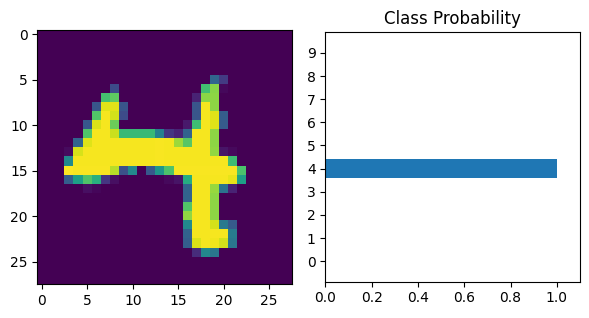

Epoche:  2 Loss: 1.46970 
Epoche:  3 Loss: 1.46970 


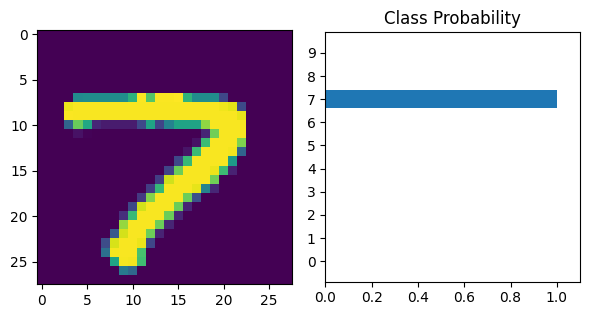

Epoche:  4 Loss: 1.55918 
Epoche:  5 Loss: 1.48744 


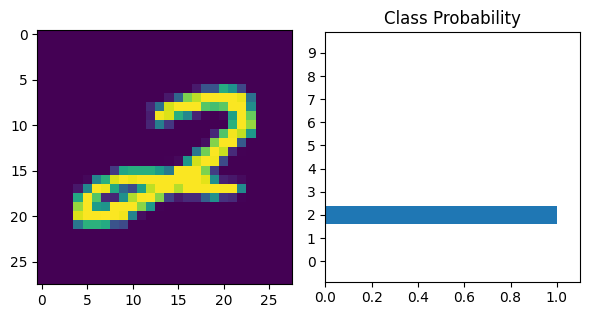

Epoche:  6 Loss: 1.52793 
Epoche:  7 Loss: 1.49668 


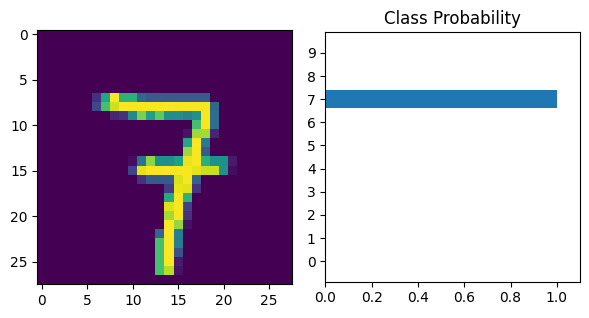

Epoche:  8 Loss: 1.49668 
Epoche:  9 Loss: 1.49240 


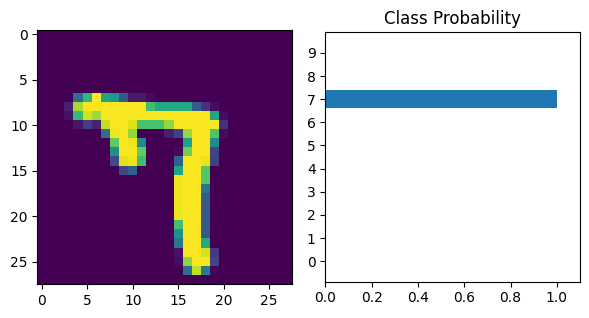

Epoche:  10 Loss: 1.46115 


In [318]:
model1 = MNIST_De_Class().to(device)

#Load Model / Continue Training
continue_training = True


FILE = "model1.pth"

if continue_training:
    model1 = torch.load(FILE).to(device)

#criterion / lf
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = optim.Adam(params=model1.parameters(),lr=learn_rate)

for epoch in range(num_epochs):
    for batch_id, (data,target) in enumerate(train_loader):
        data = data.reshape(-1,28*28).to(device)  #[100, 1,28,28] > [100,734] ?
        target = target.to(device)
        
        output = model1(data) #was macht out?
        loss = criterion(output,target) #hier out?!

        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()


    print('Epoche: ',epoch+1, 'Loss: %.5f ' % loss)
    
    if epoch %2 == 0:
        view_classifications(data[0].view(1,28,28),output[0])
     
    
    


# Save Model

In [319]:
torch.save(model1,FILE)

# Confusuion Matrix

In [320]:
# label_list = torch.zeros(batch_size)
# pred_list = torch.zeros(batch_size)

# print(label_list, pred_list)

# with torch.no_grad():
#     for data,target in test_dataset:
#         data = data.reshape(-1,28,28).to(device)
#         target = target.to(device)

#         outconf= model1(data)

        